# ML Model For Crop Prediction

1. We are using the dataset which we have already cleaned and can be found  <a href="https://github.com/Harshit564/Crop-Prediction-ML-Model/blob/main/final_crops_data.csv" target="_top">here</a>
2. Our goal is to train a ML model which can predict the crop from the given features.

In [25]:
#importing the necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [232]:
# loading the csv file into the dataframe object

crops = pd.read_csv("final_crops_data.csv")

In [75]:
crops.head()

,pH,moisture,humidity,temperature,crop
0,5.76,0.62,0.60,0.64,sugarcane
1,6.15,0.65,0.62,0.62,sugarcane
2,5.59,0.65,0.55,0.62,sugarcane
3,5.63,0.68,0.52,0.61,sugarcane
4,5.99,0.63,0.56,0.64,sugarcane


In [22]:
# features and target variable in the dataset

columns = list(crops.columns)
print("features in the dataset :-")
print(columns[:-1])
print("\n")
print("Target variable :-")
print(columns[-1])

features in the dataset :-
['pH', 'moisture', 'humidity', 'temperature']


Target variable :-
crop


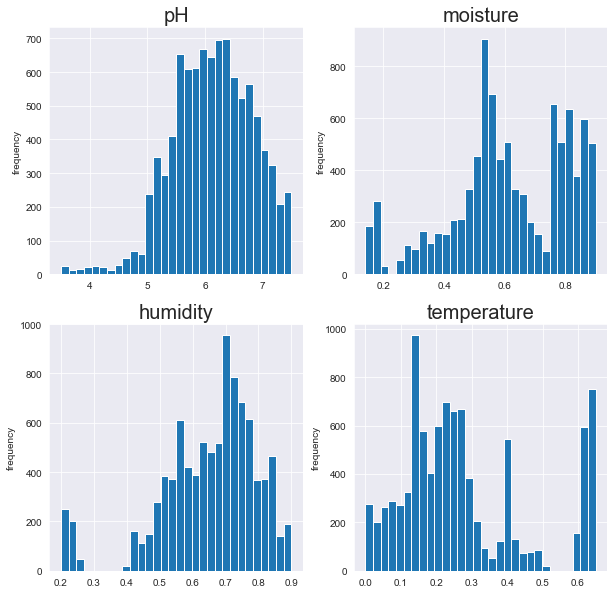

In [57]:
# Let's explore the dataset before training the ML model

fig,axes = plt.subplots(2,2,sharey=False,sharex=False,figsize=(10,10))

x = [0,0,1,1]
y = [0,1,0,1]

for x,y,feature in zip(x,y,columns[:-1]):
    axes[x,y].hist(crops[feature],bins=30)
    axes[x,y].set_title(feature,fontsize=20)
    axes[x,y].set_ylabel("frequency",fontsize=10)

plt.show()

### From the histograms of all features you can see only pH has the normal distribution

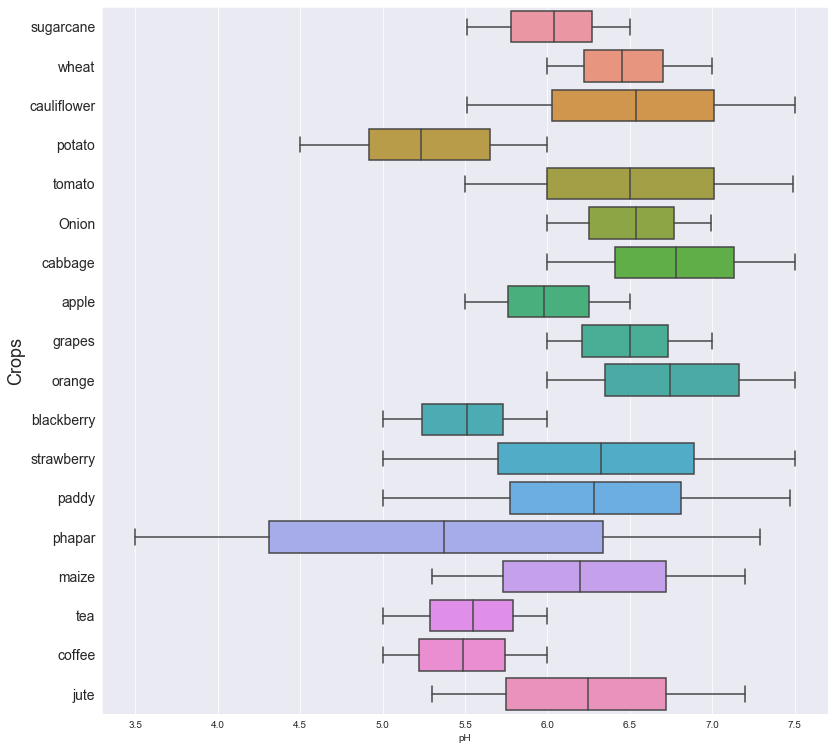

In [73]:
# Boxplots

fig,ax = plt.subplots(figsize=(13,13))

sns.boxplot(x="pH",y="crop",data=crops)
labels = ax.get_yticklabels()
ax.set_ylabel("Crops",Fontsize="18")
ax.set_yticklabels(labels,Fontsize=14)
plt.show()

### From the boxplot you can see "phaphar" crop has the largest pH range.

In [81]:
# Max humidity that can be withstand by crops

crops_max_temp = crop.groupby("crop")["humidity"].max()
crops_max_temp = crops_max_temp*100

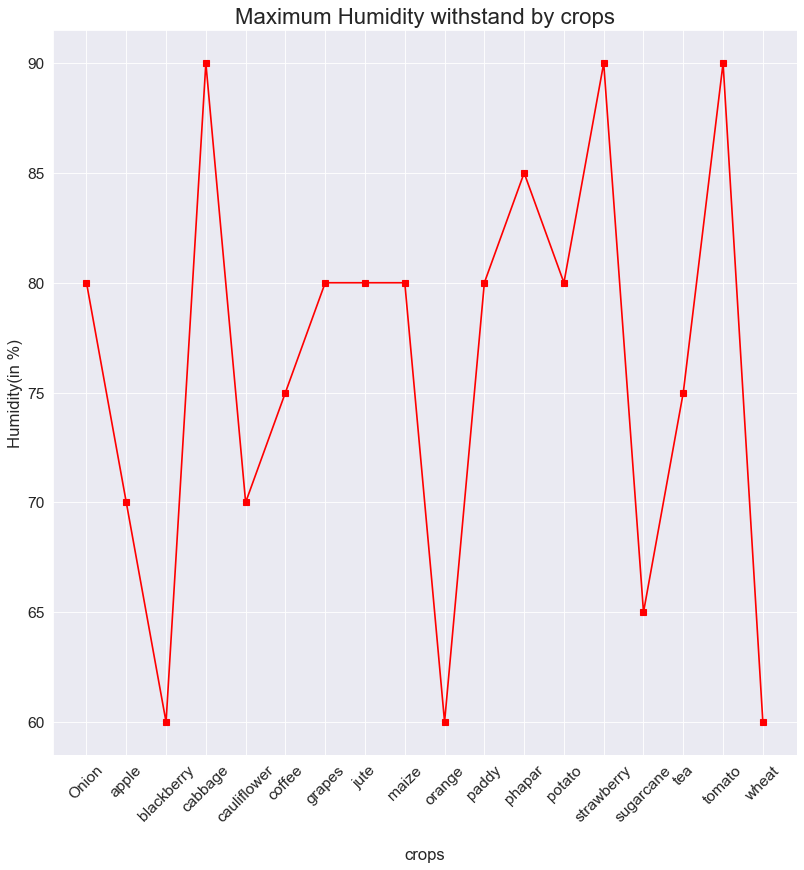

In [109]:
fig,ax = plt.subplots(figsize=(12,12),dpi=80)

ax.plot(crops_max_temp,marker="s",color='r')
ax.set_title("Maximum Humidity withstand by crops",fontsize=20)
ax.set_xlabel("crops",fontsize=15,labelpad=20)
ax.set_ylabel("Humidity(in %)",fontsize=15)
cr = ax.get_xticklabels()
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### From this graph you can see that 3 crops cabbage, strawberry and tomato can withstand the 90% humidity

In [110]:
#Splitting the data into training and testing set

features = crops.iloc[:,:-1]
label = crops.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=7,test_size=0.2, stratify=label)

7600

In [112]:
# Preprocessing the data before feeding it to the ML algorithm

from sklearn.preprocessing import StandardScaler

# Standard Scaling

std_scalar = StandardScaler()

X_train_std_scaled = std_scalar.fit_transform(X_train)
X_test_std_scaled = std_scalar.transform(X_test)

In [142]:
# Training the dataset using K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#lr_clf = LogisticRegression(max_iter=500,random_state=7)
knn_clf = KNeighborsClassifier(n_neighbors=3)

knn_clf.fit(X_train_std_scaled,y_train)

y_predict_knn = knn_clf.predict(X_test_std_scaled)

print("Accuracy score using K(=3) Neighbors is " + str(accuracy_score(y_test,y_predict_knn)))

Accuracy score using K(=3) Neighbors is 0.8668421052631579


In [147]:
lr_clf = LogisticRegression(max_iter=100000,random_state=7)
lr_clf.fit(X_train_std_scaled,y_train)
y_predict_lr = lr_clf.predict(X_test_std_scaled)

print("Accuracy score Logistic Regression using is " + str(accuracy_score(y_test,y_predict_lr)))

Accuracy score Logistic Regression using is 0.8231578947368421


In [151]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_std_scaled, y_train)

y_predict_svm = svm_clf.predict(X_test_std_scaled)

print("Accuracy score using SVM is " + str(accuracy_score(y_test,y_predict_svm)))

Accuracy score using SVM is 0.8668421052631579


In [164]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train_std_scaled, y_train)
y_predict_tree = tree_clf.predict(X_test_std_scaled)

print("Accuracy score using Decision tree classifier is " + str(accuracy_score(y_test,y_predict_tree)))

Accuracy score using Decision tree classifier is 0.8878947368421053


In [227]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=9,random_state=50)
rf_clf.fit(X_train_std_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [228]:
y_predict_rf = rf_clf.predict(X_test_std_scaled)

print("Accuracy score using Random Forest classifier is " + str(accuracy_score(y_test,y_predict_rf)))

Accuracy score using Random Forest classifier is 0.8889473684210526


In [184]:
# Finding the best hyperparameters using RandomisedSearchCV

# Forming the random grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_std_scaled, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [185]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [186]:
# Again training the Random Forest Classifier with best parameters

rf_clf_best = RandomForestClassifier(n_estimators=400,
                                     min_samples_split=2,
                                     min_samples_leaf=4,
                                     max_features="sqrt",
                                     max_depth=10,
                                    bootstrap=True)

rf_clf_best.fit(X_train_std_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
y_predict_rf_be = rf_clf_best.predict(X_test_std_scaled)

print("Accuracy score using tuned Random Forest classifier is " + str(accuracy_score(y_test,y_predict_rf_be)))

Accuracy score using tuned Random Forest classifier is 0.8863157894736842


In [195]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf_clf_grid = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_clf_grid, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_std_scaled, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [196]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [231]:
# Again training the Random Forest Classifier with best parameters found using GridSearchCV

rf_clf_best_gr = RandomForestClassifier(n_estimators=50,
                                     min_samples_split=8,
                                     min_samples_leaf=5,
                                     max_features=4,
                                     max_depth=10,
                                    bootstrap=True,
                                       random_state=50)

rf_clf_best_gr.fit(X_train_std_scaled, y_train)

y_predict_rf_gr = rf_clf_best_gr.predict(X_test_std_scaled)

print("Accuracy score using tuned(GridSearchCV) Random Forest classifier is " + str(accuracy_score(y_test,y_predict_rf_gr)))

Accuracy score using tuned(GridSearchCV) Random Forest classifier is 0.8910526315789473


## After tuning the Hyperparameter we managed to improve our model by 0.2%